<a href="https://colab.research.google.com/github/tomafischer/ai_geeks/blob/main/statistics/Distributions_Descriptive_snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Statistics
Describing the characteristics of a datasets:
> - Four momemtums: Mean, veriance, skew, kurtosis  
> - median 
> - Distribtuion shapes: modes / peaks: Unimodal/Bimodal/Multimodal
> - Dispersion: standard diviation, variance
> - Spectrum (for wave data)
> - Observation (Empirical) vs Analytical distributions

## Whey do we care about distributions?
- Most statistical procedures are based on assumptions about distributions
- Knowing these distributions is necessary for appropriately applying statistics
- Data distribution provide insight into nature
- Physical and biological systems are modeled using distributions


# Gaussian - Normal Distribution
[Wiki documentation ](https://en.wikipedia.org/wiki/Normal_distribution)  -  [SciPy Stats docu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2 }
$
where
>$\mu$ as mean  
>$\sigma$ standard divation  









In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Paramters: loc = 1, scale = 2 =>
mean: 1.0, variance: 4.0, skew:0.0, kurtosis: 0.0
sum(hy_density) = 38.95931455431624


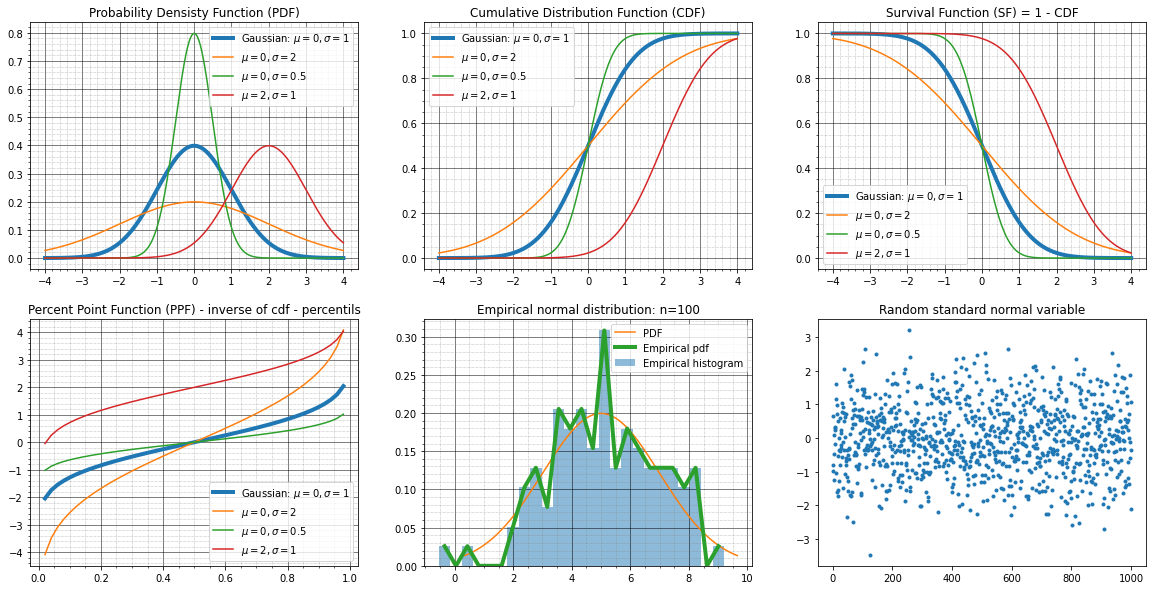

In [110]:
# number of discretizations
N= 1001
x = np.linspace(-4,4,N)
gausdist = stats.norm.pdf(x)
data_gaus = np.random.randn(N)
# printing the four momemtums
# The location (loc) keyword specifies the mean. 
# The scale (scale) keyword specifies the standard deviation.
mean, var, skew, kurt = stats.norm.stats(moments='mvsk', scale=2, loc =1)
print(f"Paramters: loc = 1, scale = 2 =>\nmean: {mean}, variance: {var}, skew:{skew}, kurtosis: {kurt}")

fig, axs = plt.subplots(2,3, figsize=(20,10))
#### first plot - PDFs
ax = axs[0][0]

ax.set_title("Probability Densisty Function (PDF)")
ax.plot(x,gausdist, linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.pdf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.pdf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.norm.pdf(x, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

### second plot - CDFs
ax = axs[0][1]

ax.set_title("Cumulative Distribution Function (CDF)")
ax.plot(x,stats.norm.cdf(x), linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.cdf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.cdf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.norm.cdf(x, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

### second plot - Survival Function (SF)
ax = axs[0][2]

ax.set_title("Survival Function (SF) = 1 - CDF")
ax.plot(x,stats.norm.sf(x), linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.sf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.sf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.norm.sf(x, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

### third plot - PPF Percent Point Function (PPF)
ax = axs[1][0]
x = np.linspace(0,1,50)
ax.set_title("Percent Point Function (PPF) - inverse of cdf - percentils")
ax.plot(x,stats.norm.ppf(x), linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.ppf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.ppf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.norm.ppf(x, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')



######
#.      Empirical
######
n = 100 # Sample size
stretch = 2 # standard diviation
shift = 5 # mean
bins = 25
data = stretch * np.random.randn(n) + shift

x = np.linspace(stats.norm.ppf(0.01,loc = shift, scale = stretch), 
                stats.norm.ppf(0.99,loc = shift, scale = stretch), 
                200)


ax = axs[1][1]
ax.set_title(f"Empirical normal distribution: n={n}")
#default histogram
ax.hist(data, bins=bins, label="Empirical histogram", density=True, alpha= 0.5 )
#overlaying the actual pdf
ax.plot(x, stats.norm.pdf(x, loc = shift, scale = stretch), label = "PDF")
#overalying empircal pdf
hy, hx = np.histogram(data, bins = bins)
hxx = (hx[1:] + hx[:-1]) / 2
# calculating the density : y  = y / (sum(y) * width of bin)
hy_density = hy / (np.sum(hy) * np.diff(hx))
print(f"sum(hy_density) = {np.sum(hy * np.diff(hx))}")
ax.plot(hxx, hy_density, label ="Empirical pdf", linewidth=4) 

ax.legend()
ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# plotting data
ax = axs[1][2]
ax.set_title("Random standard normal variable")
ax.plot(data_gaus,'.')

plt.show()

sum(hy) = 1.0


# Log Normal Distribution
[Wiki documentation](https://en.wikipedia.org/wiki/Log-normal_distribution#Occurrence_and_applications)
Let $Z$ be a **standard normal variable**, and let $\mu$  and $\sigma >0 $ be two real numbers.   
Then, the distribution of the random variable

$
X=e^{\mu +\sigma Z}
$

is called the **log-normal distribution** with parameters $\mu$  and $\sigma$

Paramters: loc = 5, scale = 0.5 =>
mean: 5.8243606353500645, variance: 1.167693567617901, skew:6.184877138632554, kurtosis: 110.9363921763115
Empirical: mean = 159.9383380353548


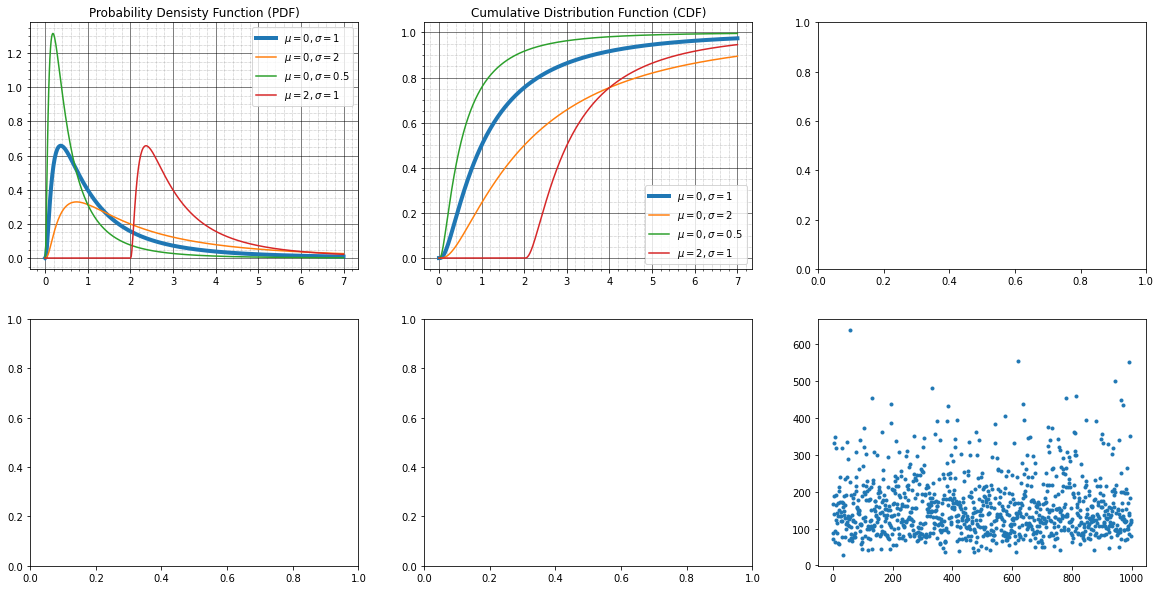

In [131]:
#####
#.  Empiricaln log-normal
#####
N= 500 
n = 1000
shift = 5
stretch = .5

data_log_normal = stretch * np.random.randn(n) + shift
data_log_normal = np.exp(data_log_normal)

mean, var, skew, kurt = stats.lognorm.stats(moments='mvsk', s=1, scale=stretch, loc =shift)
print(f"Paramters: loc = {shift}, scale = {stretch} =>\nmean: {mean}, variance: {var}, skew:{skew}, kurtosis: {kurt}")
print(f"Empirical: mean = {np.mean(data_log_normal)}")

fig, axs = plt.subplots(2,3, figsize=(20,10))

ax = axs[0][0]
x = np.linspace(0.001,7, N )
ax.set_title("Probability Densisty Function (PDF)")
ax.plot(x,stats.lognorm.pdf(x, s=1), label ="$\mu =0, \sigma =1$", linewidth = 4)
ax.plot(x, stats.lognorm.pdf(x, s=1,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.lognorm.pdf(x, s=1, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.lognorm.pdf(x, s=1, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

ax = axs[0][1]
x = np.linspace(0.001,7, N )
ax.set_title("Cumulative Distribution Function (CDF)")
ax.plot(x,stats.lognorm.cdf(x, s=1), label ="$\mu =0, \sigma =1$", linewidth = 4)
ax.plot(x, stats.lognorm.cdf(x, s=1,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.lognorm.cdf(x, s=1, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.lognorm.cdf(x, s=1, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')


#### first plot - data
ax = axs[1][2]
ax.plot(data_log_normal,'.')


plt.show()

In [113]:
data_log_normal

array([ 91.10342134, 198.27487471, 104.86127364, 145.02943383,
       158.41275326, 224.72097252, 383.52431326,  61.54790634,
       116.66933356, 247.52502296,  77.52083276, 340.13456495,
        64.92974219, 272.77237429,  88.84369747, 185.48662822,
       209.12761176, 337.87478361, 212.47196556, 327.23748647,
       134.33225644,  87.94612384, 148.36533026, 159.00659879,
       110.30237122, 234.19721824, 374.96109014, 233.62991382,
       185.69159155, 276.29850285, 118.6714041 , 355.66883338,
       221.11862615,  93.78964145, 116.97973127,  90.60534793,
       165.28990873, 230.97758868, 230.75278368,  87.33775878,
        94.67888989, 139.03222714, 217.44983445,  82.8544506 ,
       186.0124162 ,  85.87067063, 235.80309696, 147.61735495,
       136.88777904, 112.53661359, 123.16204718, 165.06668517,
       105.00198907, 182.33088374, 186.17631591, 163.87555854,
       164.18908028, 168.47102296,  94.10637035, 226.94204084,
       112.08805081, 284.2385576 , 400.15459297, 160.83

In [40]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk', scale=2, loc =1)
print(f"mean: {mean}, variance: {var}, skew:{skew}, kurtosis: {kurt}")

mean: 1.0, variance: 4.0, skew:0.0, kurtosis: 0.0
